In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
mate= ['Mate']

dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]
dfmate

,victory_status,opening_shortname
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
9,Mate,Scandinavian Defense
10,Mate,Van't Kruijs Opening
...,...,...
20049,Mate,French Defense
20051,Mate,French Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game


In [66]:
dfmateclean=dfmate['opening_shortname'].value_counts().to_frame()
dfmateclean

,opening_shortname
Sicilian Defense,721
French Defense,428
Queen's Pawn Game,421
King's Pawn Game,376
Italian Game,309
...,...
Australian Defense,1
System,1
Wade Defense,1
Doery Defense,1


In [15]:
winrate=dfmate['opening_shortname'].value_counts()[:106].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:106].sort_index(ascending=True)

<AxesSubplot:>

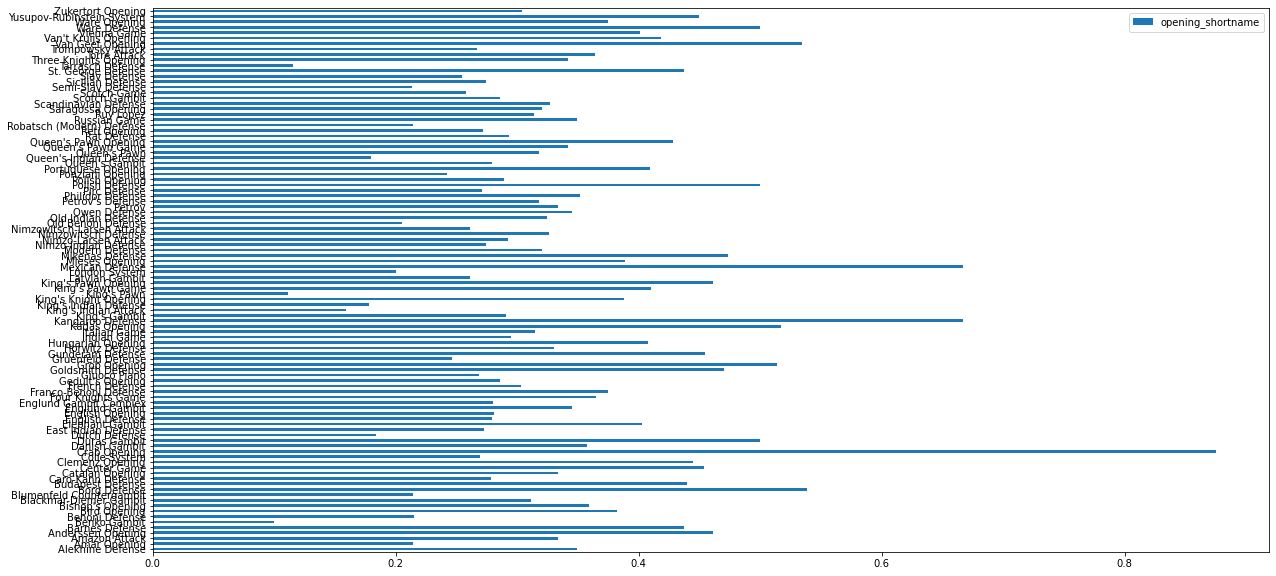

In [16]:
dfwinrate=winrate.to_frame()
dfwinrateclean=dfwinrate.dropna(axis=0)
dfwinrateclean.plot(kind="barh", figsize=(20,10))

In [17]:
df=pd.read_csv("chess_games.csv")

dfvicopen= df[['victory_status', 'opening_shortname']]
mate= ['Mate']

dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]
winrate=dfmate['opening_shortname'].value_counts()[:106].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:106].sort_index(ascending=True)
dfwinrate=winrate.to_frame()
dfwinrateclean=dfwinrate.dropna(axis=0)

In [18]:
def load_and_process(notebooks):
    df=pd.read_csv("chess_games.csv")

    dfvicopen= df[['victory_status', 'opening_shortname']]
    mate= ['Mate']

    dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]
    winrate=dfmate['opening_shortname'].value_counts()[:106].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:106].sort_index(ascending=True)
    dfwinrate=winrate.to_frame()
    
    return dfwinrateclean
    

In [63]:
load_and_process("chess_games.csv")
dfwinrateclean.rename(columns={'opening_shortname' : 'Wins by Checkmate'})

,Wins by Checkmate
Alekhine Defense,0.348958
Amar Opening,0.214286
Amazon Attack,0.333333
Anderssen Opening,0.461538
Barnes Defense,0.437500
...,...
Vienna Game,0.401460
Ware Defense,0.500000
Ware Opening,0.375000
Yusupov-Rubinstein System,0.450000


In [20]:
load_and_process("chess_games.csv").to_csv("top100.csv")

In [27]:
dfmateclean.rename(columns={'opening_shortname' : 'Wins by Checkmate'})

,Wins by Checkmate
Sicilian Defense,721
French Defense,428
Queen's Pawn Game,421
King's Pawn Game,376
Italian Game,309
...,...
Australian Defense,1
System,1
Wade Defense,1
Doery Defense,1


In [30]:
dfmatecleannew=dfmateclean.rename(columns={'opening_shortname' : 'Wins by Checkmate'})

In [60]:
list(dfmatecleannew.sort_index(ascending=True))

['Wins by Checkmate']

In [59]:
pd.merge(dfmatecleannew, dfwinrateclean, on=['Wins by Checkmate'])

KeyError: 'Wins by Checkmate'